In [1]:
import numpy as np

In [2]:
repeats = 1000

sizes = [25, 10_000]

In [3]:
alpha = 0.05

In [4]:
mu1 = 0
mu2 = 0

var1 = 2
var2 = 1

std1 = np.sqrt(var1)
std2 = np.sqrt(var2)

tau_true = var1 / var2

In [5]:
from collections import defaultdict
from scipy.stats import f


results = defaultdict(int)
taus = defaultdict(list)

for size in sizes:
    for i in range(repeats):
        X, Y = np.random.normal(mu1, std1, size), np.random.normal(mu2, std2, size)
        var_x, var_y = np.var(X), np.var(Y)
        tau_cap = (size * (size - 1) * var_x) / (size * (size - 1) * var_y)
        
        taus[(size, repeats)].append(tau_cap)
        
        # Интервал
        lower = f.ppf(alpha / 2, size - 1, size - 1) * tau_cap
        upper = f.ppf(1 - alpha / 2, size - 1, size - 1) * tau_cap
        
        if lower <= tau_true <= upper:
            results[(size, repeats)] += 1

In [6]:
for size in sizes:
    prob = results[(size, repeats)] / repeats
    print(f'{size=} {repeats=} {prob=}')

size=25 repeats=1000 prob=0.943
size=10000 repeats=1000 prob=0.949


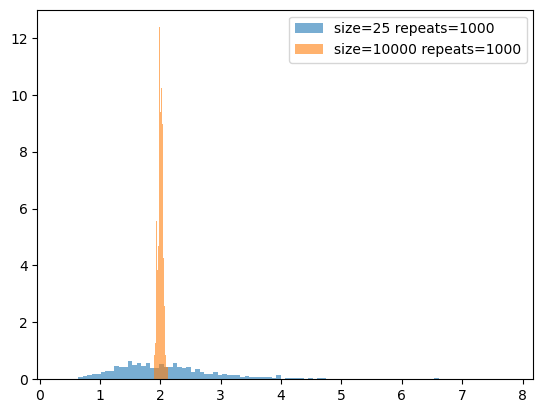

In [7]:
import matplotlib.pyplot as plt

for size in sizes:
    data = taus[(size, repeats)]
    plt.hist(data, bins=100, alpha=0.6, label=f'{size=} {repeats=}', density=True)
 
plt.legend()  
plt.show()

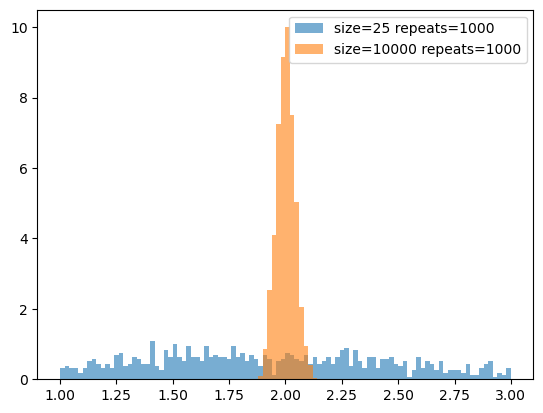

In [8]:
for size in sizes:
    data = taus[(size, repeats)]
    plt.hist(data, bins=100, alpha=0.6, label=f'{size=} {repeats=}', range=(1, 3), density=True)
 
plt.legend()  
plt.show()

### Больший размер выборки приводит к сужению доверительного интервала и лучшему покрытию оцениваемой  величины